<a href="https://colab.research.google.com/github/abhirukth/Data-Sci.-File/blob/main/Covid_vacc_track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d gpreda/covid-world-vaccination-progress

  0% 0.00/467k [00:00<?, ?B/s]
100% 467k/467k [00:00<00:00, 63.3MB/s]


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import math

In [5]:
df_vacc = pd.read_csv('/content/country_vaccinations.csv')
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20918,Zimbabwe,ZWE,2021-05-24,914921.0,633635.0,281286.0,3888.0,14380.0,6.16,4.26,1.89,968.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20919,Zimbabwe,ZWE,2021-05-25,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20920,Zimbabwe,ZWE,2021-05-26,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20921,Zimbabwe,ZWE,2021-05-27,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...


### Dataset of the country "Afghanistan"

In [ ]:
df_vacc.loc[df_vacc.country == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Afghanistan,AFG,2021-05-22,NaN,NaN,NaN,NaN,5257.0,NaN,NaN,NaN,135.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
90,Afghanistan,AFG,2021-05-23,NaN,NaN,NaN,NaN,5474.0,NaN,NaN,NaN,141.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,NaN,5692.0,1.47,1.22,0.25,146.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
92,Afghanistan,AFG,2021-05-25,NaN,NaN,NaN,NaN,6230.0,NaN,NaN,NaN,160.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
# len(df_vacc.country.unique())
df_vacc.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 

The list of different countries has been printed in an numpy array, which will help in data analysis in further stage

### Graph plot of "Afghanistan" representing cummulative total vaccinations for each day

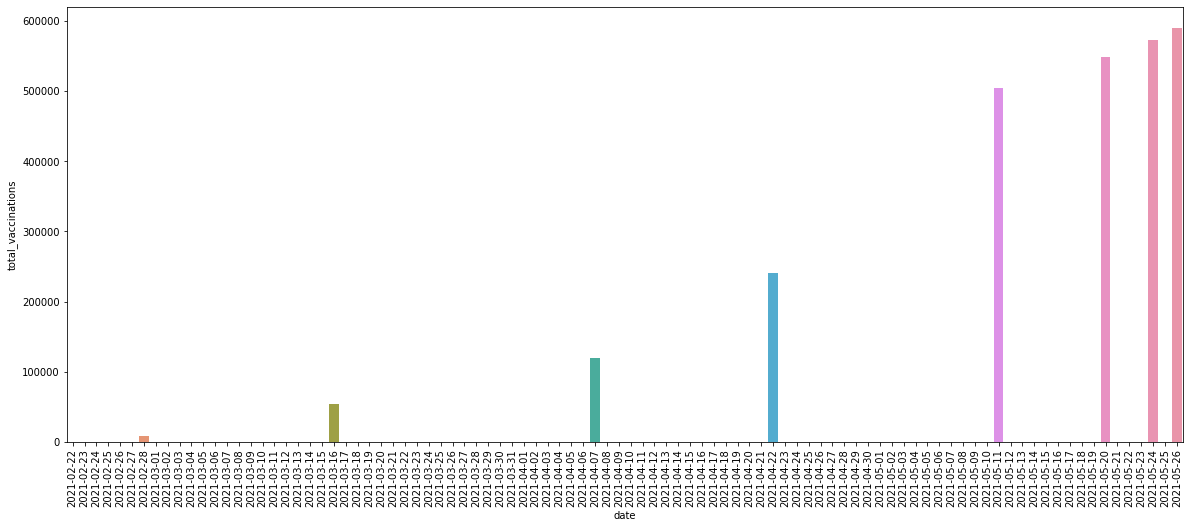

In [ ]:
figure(figsize = (20, 8))
sns.barplot(x = df_vacc.loc[df_vacc.country == 'Afghanistan']['date'], y = df_vacc.loc[df_vacc.country == 'Afghanistan']['total_vaccinations'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_vacc.daily_vaccinations = df_vacc.daily_vaccinations.fillna(0)
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20918,Zimbabwe,ZWE,2021-05-24,914921.0,633635.0,281286.0,3888.0,14380.0,6.16,4.26,1.89,968.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20919,Zimbabwe,ZWE,2021-05-25,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20920,Zimbabwe,ZWE,2021-05-26,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20921,Zimbabwe,ZWE,2021-05-27,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...


Daily vaccination slots having NULL values can be replaced by 0.0 as there is no record on the first day of that particular country.



*   We can observe that there are NULL values in total vaccinations column.
*   Total vaccinations are sum of daily vaccinations for that current date.
*   Hence Total vaccinations can be depicted as the cummulative sum of each current daily vaccinations with the previous date's total vaccination count.
*   Hence NULL values in total vaccinations can be replaced





In [ ]:
for i in range(len(df_vacc.total_vaccinations)):
  if np.isnan(df_vacc.total_vaccinations[i]):
    df_vacc.total_vaccinations[i] = df_vacc.daily_vaccinations[i] + df_vacc.total_vaccinations[i-1]
  
df_vacc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,1367.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,2734.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,4101.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,5468.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20918,Zimbabwe,ZWE,2021-05-24,914921.0,633635.0,281286.0,3888.0,14380.0,6.16,4.26,1.89,968.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20919,Zimbabwe,ZWE,2021-05-25,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20920,Zimbabwe,ZWE,2021-05-26,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...
20921,Zimbabwe,ZWE,2021-05-27,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1398356390...


#### Graph plot of "Afghanistan" representing cummulative total vaccinations for each day after filling missing data

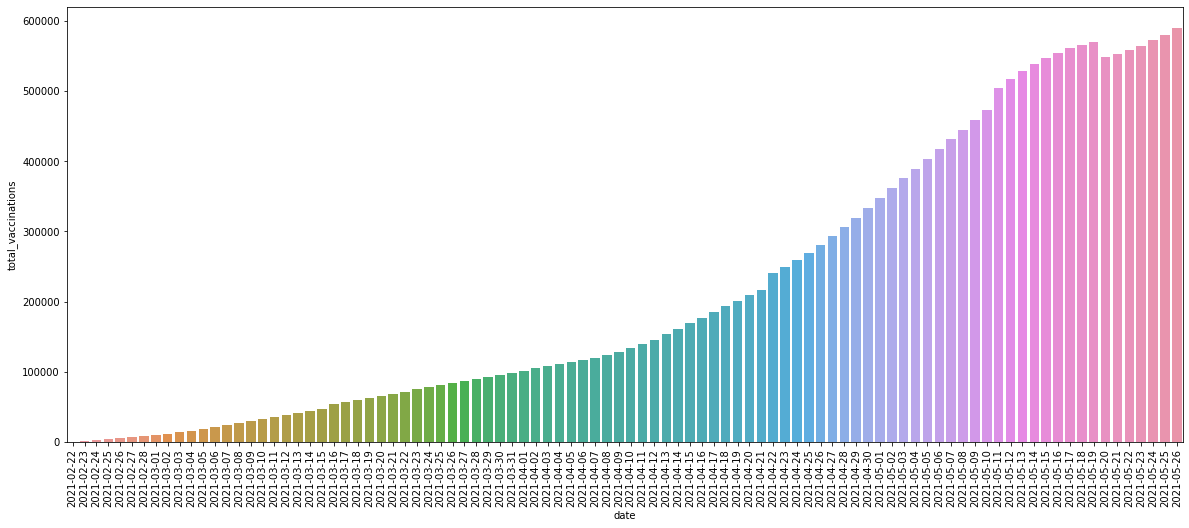

In [ ]:
figure(figsize = (20, 8))
sns.barplot(x = df_vacc.loc[df_vacc.country == 'Afghanistan']['date'], y = df_vacc.loc[df_vacc.country == 'Afghanistan']['total_vaccinations'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# figure(figsize = (50, 8))
# sns.barplot(x = df_vacc['country'], y = df_vacc['total_vaccinations'])
# plt.xticks(rotation = 90)
# plt.show()

In [ ]:
# def plot_date_totalVacc(country_name):
#   figure(figsize = (20, 8))
#   sns.barplot(x = df_vacc.loc[df_vacc.country == country_name]['date'], y = df_vacc.loc[df_vacc.country == country_name]['total_vaccinations'])
#   plt.xticks(rotation = 90)
#   plt.show()

In [ ]:
def vaccine_count(country_name):
  print("Country name : " + country_name)
  print(df_vacc.loc[df_vacc.country == country_name]['vaccines'].unique())
  print("\n")

In [ ]:
# for i in df_vacc.country.unique():
#   plot_date_totalVacc(i)

Task 1 : "What vaccines are used and in which countries?" done ✔️

In [ ]:
for i in df_vacc.country.unique():
  vaccine_count(i)

Country name : Afghanistan
['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing']


Country name : Albania
['Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V']


Country name : Algeria
['Sputnik V']


Country name : Andorra
['Oxford/AstraZeneca, Pfizer/BioNTech']


Country name : Angola
['Oxford/AstraZeneca']


Country name : Anguilla
['Oxford/AstraZeneca']


Country name : Antigua and Barbuda
['Oxford/AstraZeneca']


Country name : Argentina
['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']


Country name : Armenia
['Oxford/AstraZeneca, Sinovac, Sputnik V']


Country name : Aruba
['Pfizer/BioNTech']


Country name : Australia
['Oxford/AstraZeneca, Pfizer/BioNTech']


Country name : Austria
['Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']


Country name : Azerbaijan
['Oxford/AstraZeneca, Sinovac, Sputnik V']


Country name : Bahamas
['Oxford/AstraZeneca']


Country name : Bahrain
['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V']


Coun

In [ ]:
# figure(figsize = (20, 8))
# sns.countplot(df_vacc.vaccines)
# plt.xticks(rotation = 90)
# plt.show()

Task 2 : "What country is vaccinated more people?" done ✔️

Answer : China has vaccinated more people

In [ ]:
country_name = []
vaccine_count = []
country_vaccine = []

for i in df_vacc.country.unique():
  array = df_vacc.loc[df_vacc.country == i]['total_vaccinations'].fillna(0)
  np_array = np.array(array)
  country_name.append(i)
  vaccine_count.append(np_array[-1])

country_vaccine.append(country_name)
country_vaccine.append(vaccine_count)
country_vaccine

[['Afghanistan',
  'Albania',
  'Algeria',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'England',
  'Equatorial Guinea',
  'Estonia',
  'Eswatini',
  'Ethiopia',
  'Faeroe Islands',
  'Fa

In [ ]:
df_country_vacc = pd.DataFrame(country_vaccine).transpose()
df_country_vacc.columns = ['Country_Name', 'Total_vaccinations']
df_country_vacc

,Country_Name,Total_vaccinations
0,Afghanistan,590454
1,Albania,759043
2,Algeria,75000
3,Andorra,32317
4,Angola,859979
...,...,...
209,Wales,3.20922e+06
210,Wallis and Futuna,8283
211,Yemen,18555
212,Zambia,146645


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


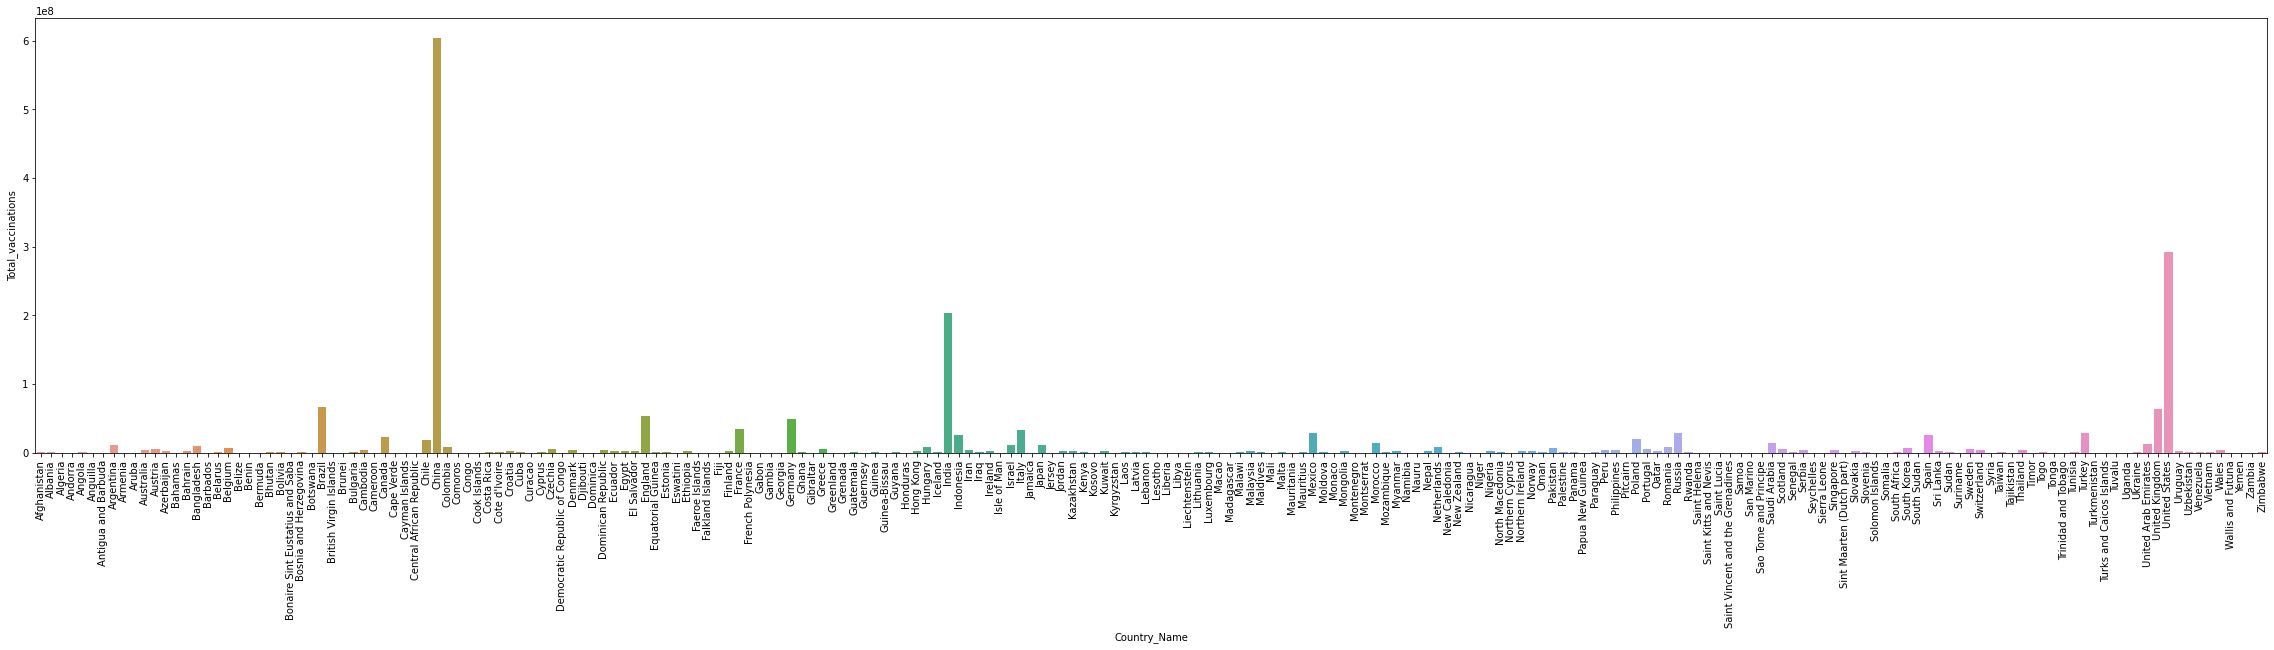

In [ ]:
figure(figsize = (40, 8))
sns.barplot(df_country_vacc.Country_Name, df_country_vacc.Total_vaccinations)
plt.xticks(rotation = 90)
plt.show()

Task 3 : "What country is vaccinated a larger percent from its population?" done ✔️

Answer : Gibraltar has vaccinated a larger percent from its population

In [ ]:
country_name = []
vaccine_count_percentage = []
country_vaccine_percentage = []

for i in df_vacc.country.unique():
  vacc_per = df_vacc.loc[df_vacc.country == i]['people_fully_vaccinated_per_hundred'].fillna(0)
  array_vacc = np.array(vacc_per)
  country_name.append(i)
  vaccine_count_percentage.append(array_vacc[-1])

country_vaccine_percentage.append(country_name)
country_vaccine_percentage.append(vaccine_count_percentage)
country_vaccine_percentage

[['Afghanistan',
  'Albania',
  'Algeria',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'England',
  'Equatorial Guinea',
  'Estonia',
  'Eswatini',
  'Ethiopia',
  'Faeroe Islands',
  'Fa

In [ ]:
df_country_vacc_per = pd.DataFrame(country_vaccine_percentage).transpose()
df_country_vacc_per.columns = ['Country_Name', 'Vaccine_percentage']
df_country_vacc_per

,Country_Name,Vaccine_percentage
0,Afghanistan,0.29
1,Albania,9.63
2,Algeria,0
3,Andorra,6.09
4,Angola,0.6
...,...,...
209,Wales,34.29
210,Wallis and Futuna,34.95
211,Yemen,0
212,Zambia,0.03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


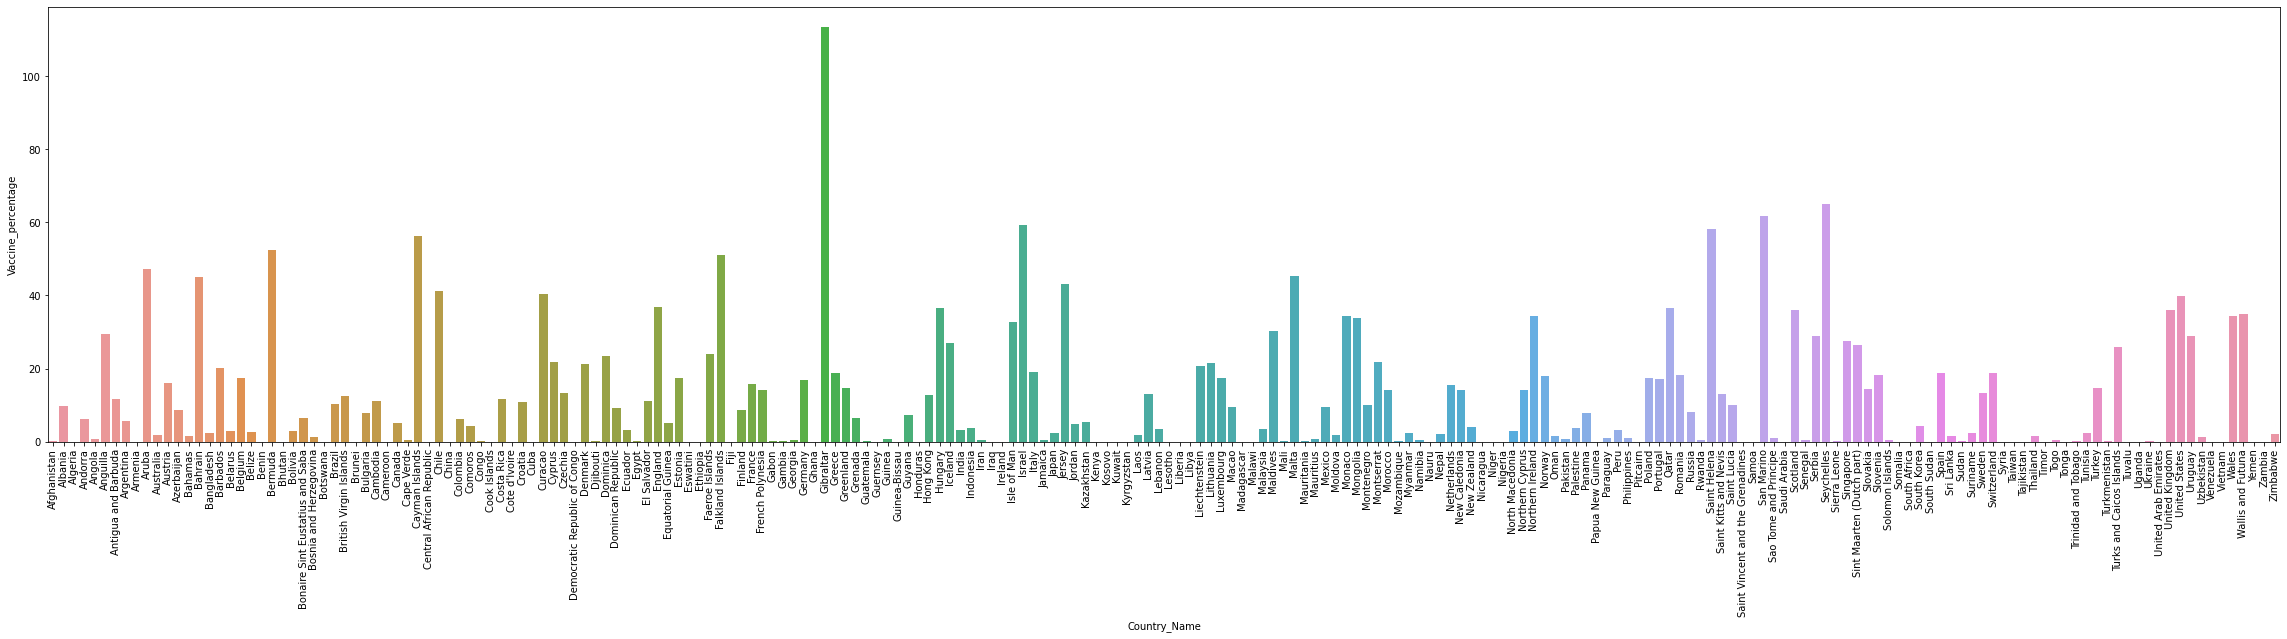

In [ ]:
figure(figsize = (40, 8))
sns.barplot(df_country_vacc_per.Country_Name, df_country_vacc_per.Vaccine_percentage)
plt.xticks(rotation = 90)
plt.show()